In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=20

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475317, 20, 16)
strides:  (2560, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x165998bb040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475317,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x165e2134040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380253

In [9]:
training_sample

380253

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380253, 20, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380253,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380253, 20, 15) (380253, 1) (95064, 20, 15) (95064, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(256,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=128,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=64),#,activation='relu'),
    keras.layers.Dense(units=100,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])

#opt=keras.optimizers.SGD(learning_rate=0.9)
opt=keras.optimizers.Adam(learning_rate=0.0002)
model_gru.compile(loss='BinaryCrossentropy', optimizer=opt,metrics=['accuracy'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 20, 256)           209664    
                                                                 
 gru_1 (GRU)                 (None, 20, 128)           148224    
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401,737
Trainable params: 401,737
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y),batch_size=8192)#, shuffle=False)

Epoch 1/140
47/47 [==============================] - 9s 119ms/step - loss: 0.5842 - accuracy: 0.7393 - val_loss: 0.5527 - val_accuracy: 0.7531
Epoch 2/140
47/47 [==============================] - 5s 105ms/step - loss: 0.5462 - accuracy: 0.7380 - val_loss: 0.5103 - val_accuracy: 0.7458
Epoch 3/140
47/47 [==============================] - 5s 106ms/step - loss: 0.5107 - accuracy: 0.7367 - val_loss: 0.4892 - val_accuracy: 0.7523
Epoch 4/140
47/47 [==============================] - 5s 106ms/step - loss: 0.5018 - accuracy: 0.7390 - val_loss: 0.4842 - val_accuracy: 0.7528
Epoch 5/140
47/47 [==============================] - 5s 106ms/step - loss: 0.4962 - accuracy: 0.7420 - val_loss: 0.4796 - val_accuracy: 0.7533
Epoch 6/140
47/47 [==============================] - 5s 106ms/step - loss: 0.4907 - accuracy: 0.7459 - val_loss: 0.4772 - val_accuracy: 0.7534
Epoch 7/140
47/47 [==============================] - 5s 105ms/step - loss: 0.4834 - accuracy: 0.7483 - val_loss: 0.4716 - val_accuracy: 0.7537

Epoch 58/140
47/47 [==============================] - 5s 111ms/step - loss: 0.4364 - accuracy: 0.7765 - val_loss: 0.4365 - val_accuracy: 0.7790
Epoch 59/140
47/47 [==============================] - 5s 111ms/step - loss: 0.4362 - accuracy: 0.7766 - val_loss: 0.4326 - val_accuracy: 0.7782
Epoch 60/140
47/47 [==============================] - 5s 111ms/step - loss: 0.4362 - accuracy: 0.7768 - val_loss: 0.4367 - val_accuracy: 0.7769
Epoch 61/140
47/47 [==============================] - 5s 109ms/step - loss: 0.4361 - accuracy: 0.7767 - val_loss: 0.4325 - val_accuracy: 0.7786
Epoch 62/140
47/47 [==============================] - 5s 109ms/step - loss: 0.4351 - accuracy: 0.7768 - val_loss: 0.4327 - val_accuracy: 0.7786
Epoch 63/140
47/47 [==============================] - 5s 109ms/step - loss: 0.4354 - accuracy: 0.7764 - val_loss: 0.4315 - val_accuracy: 0.7790
Epoch 64/140
47/47 [==============================] - 5s 109ms/step - loss: 0.4355 - accuracy: 0.7770 - val_loss: 0.4310 - val_accuracy:

Epoch 115/140
47/47 [==============================] - 5s 112ms/step - loss: 0.4280 - accuracy: 0.7811 - val_loss: 0.4274 - val_accuracy: 0.7816
Epoch 116/140
47/47 [==============================] - 5s 112ms/step - loss: 0.4273 - accuracy: 0.7821 - val_loss: 0.4329 - val_accuracy: 0.7838
Epoch 117/140
47/47 [==============================] - 5s 112ms/step - loss: 0.4260 - accuracy: 0.7816 - val_loss: 0.4316 - val_accuracy: 0.7822
Epoch 118/140
47/47 [==============================] - 5s 112ms/step - loss: 0.4263 - accuracy: 0.7819 - val_loss: 0.4283 - val_accuracy: 0.7791
Epoch 119/140
47/47 [==============================] - 5s 117ms/step - loss: 0.4258 - accuracy: 0.7821 - val_loss: 0.4279 - val_accuracy: 0.7783
Epoch 120/140
47/47 [==============================] - 5s 112ms/step - loss: 0.4258 - accuracy: 0.7823 - val_loss: 0.4294 - val_accuracy: 0.7806
Epoch 121/140
47/47 [==============================] - 5s 111ms/step - loss: 0.4261 - accuracy: 0.7820 - val_loss: 0.4266 - val_ac

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 14s 4ms/step


In [25]:
stop=t.time()-start
print(stop)

729.9889848232269


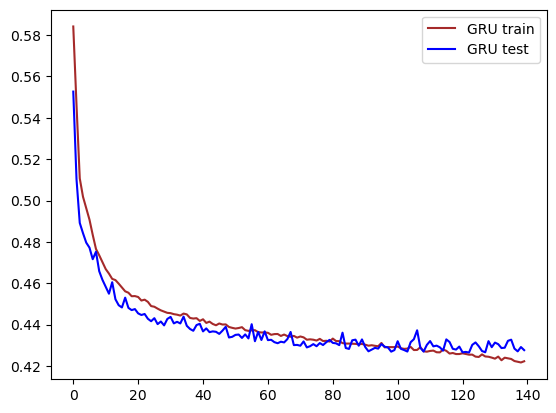

In [26]:
#plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
#plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

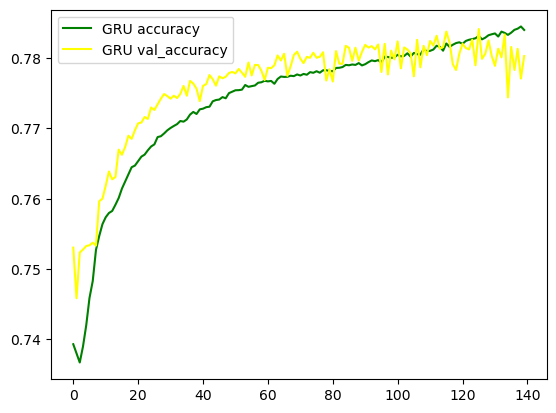

In [27]:
plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.legend()
plt.show()

In [28]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [29]:
np.shape(pred_y)

(95064, 1)

In [30]:
pred_y

array([[0.00139554],
       [0.00053161],
       [0.00027936],
       ...,
       [0.06485824],
       [0.06757126],
       [0.06828493]], dtype=float32)

In [32]:
pred_y=np.reshape(pred_y,95064)

0.14335626310590374
0.22912402700493173
0.37862417131755305
0.2828162741963866


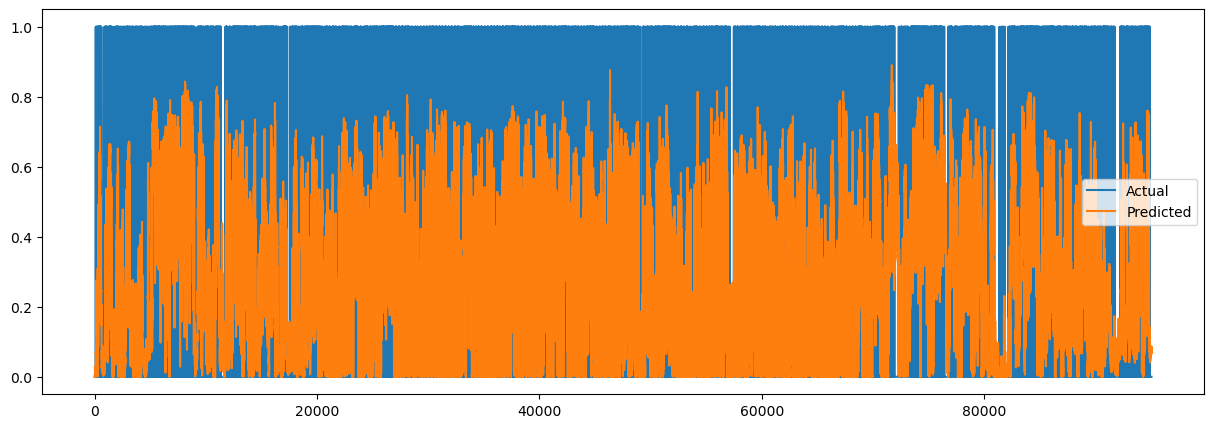

In [33]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [34]:
np.shape(train_X)

(380253, 20, 15)

In [35]:
np.shape(train_y)

(380253, 1)

In [36]:
np.shape(test_X)

(95064, 20, 15)

In [37]:
np.shape(test_y)

(95064, 1)

14854/14854 [==============================] - 65s 4ms/step


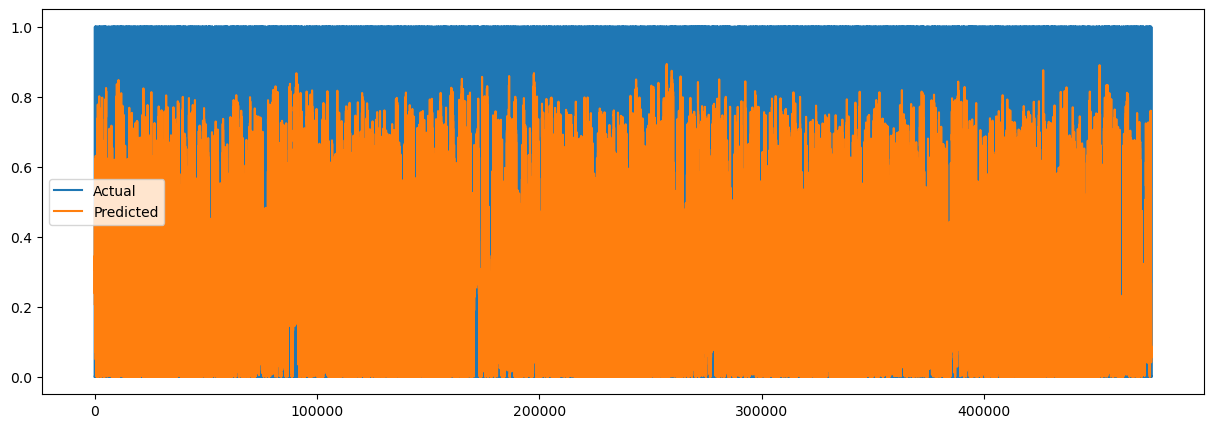

In [38]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

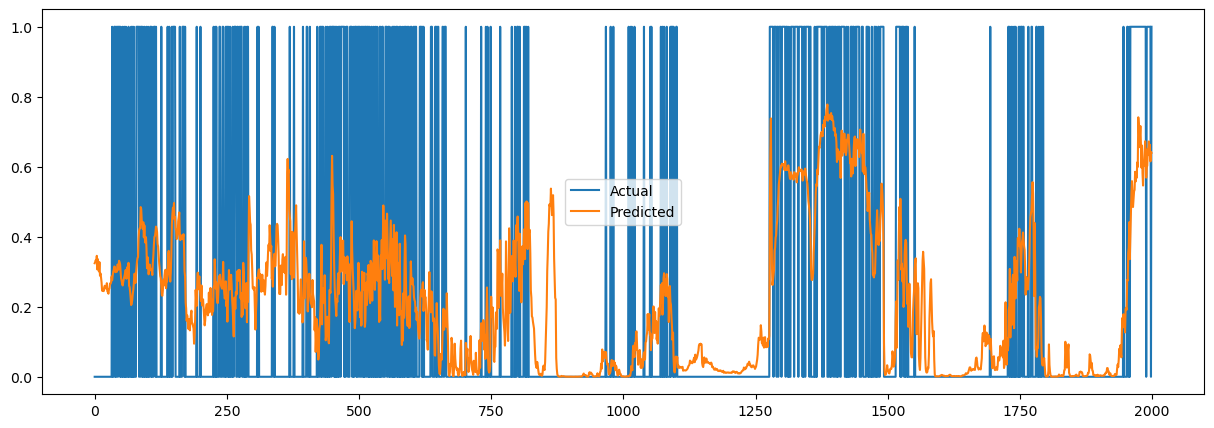

In [39]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [40]:
print(sum(tes)/len(tes))

[0.25794785]


In [41]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.60981494]
[0.82371818]
total acc [0.78342454]


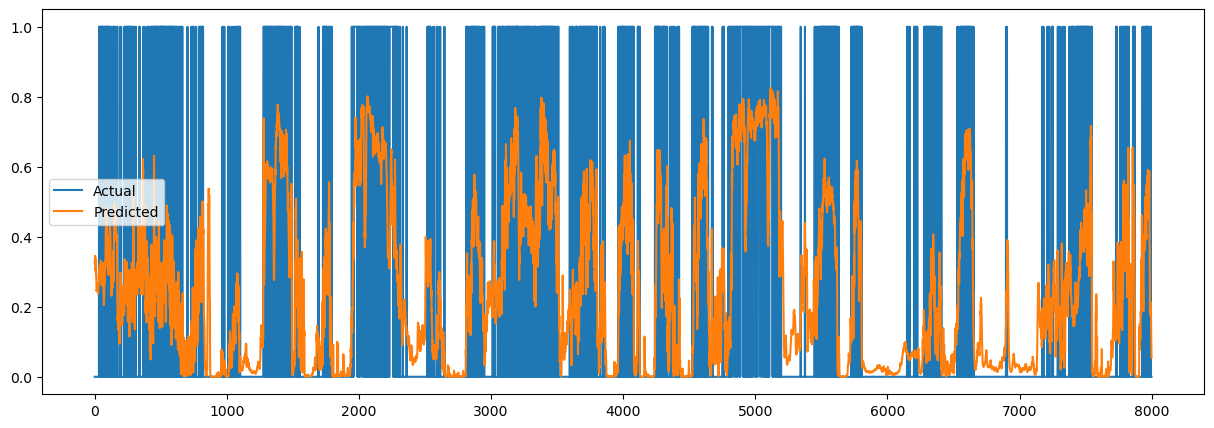

In [42]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

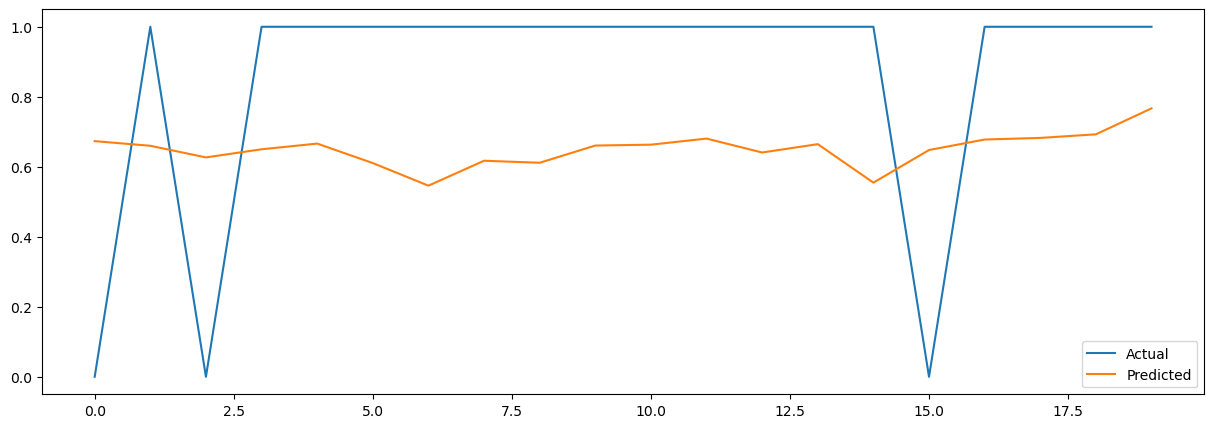

In [43]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

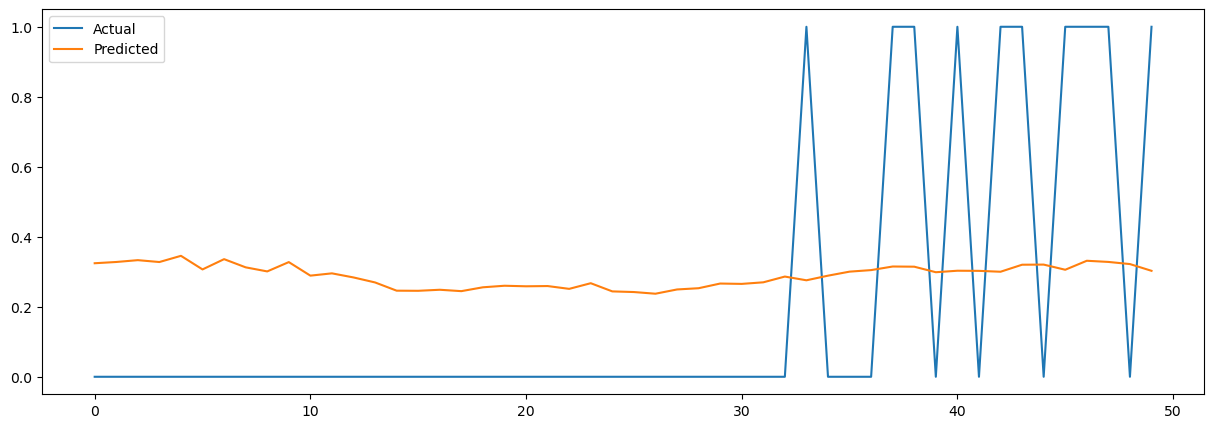

In [44]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

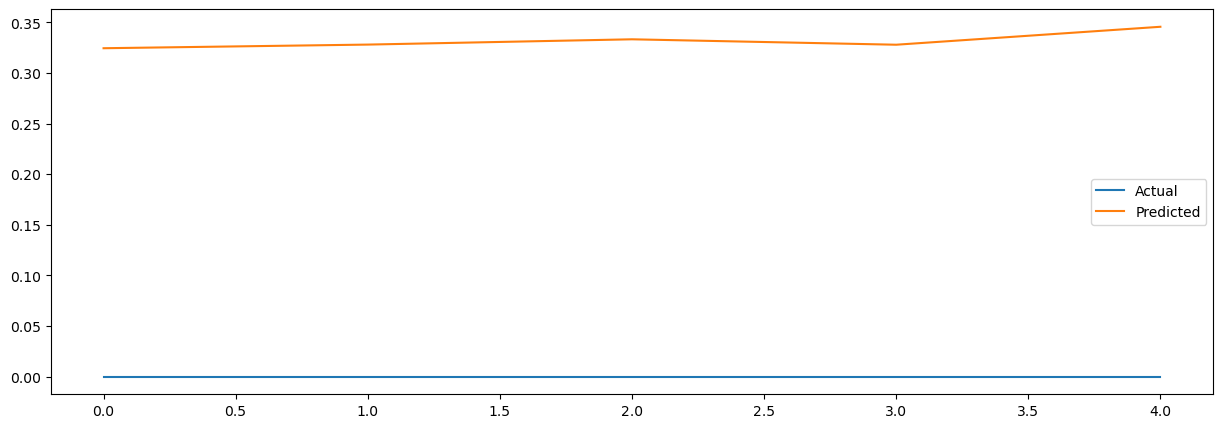

In [45]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

In [46]:
tf.config.experimental.get_memory_info('GPU:0')

{'current': 689931520, 'peak': 3363362048}